In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np

cnx = create_engine('postgresql://postgres@54.183.254.126:5432/simpsons')
#cnx = create_engine('postgresql://username:password@ip_address:port/dbname')
#port ~ 5432

In [2]:
df_episodes = pd.read_sql_query('''SELECT * FROM episodes ORDER BY id''',cnx)

In [3]:
df_episodes

,id,title,original_air_date,production_code,season,number_in_season,number_in_series,us_viewers_in_millions,views,imbd_rating,imbd_votes,image_url,video_url
0,1,Simpsons Roasting on an Open Fire,1989-12-17,7G08,1,1,1,26.70,171408.0,8.2,3734,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/273376835817
1,2,Bart the Genius,1990-01-14,7G02,1,2,2,24.50,91423.0,7.8,1973,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/283744835990
2,3,Homer's Odyssey,1990-01-21,7G03,1,3,3,27.50,78072.0,7.5,1709,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/273381443699
3,4,There's No Disgrace Like Home,1990-01-28,7G04,1,4,4,20.20,67378.0,7.8,1701,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/273392195780
4,5,Bart the General,1990-02-04,7G05,1,5,5,27.10,63129.0,8.1,1732,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/300934723994
5,6,Moaning Lisa,1990-02-11,7G06,1,6,6,27.40,55355.0,7.6,1674,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/273391683535
6,7,The Call of the Simpsons,1990-02-18,7G09,1,7,7,27.60,57793.0,7.9,1638,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/273396803837
7,8,The Telltale Head,1990-02-25,7G07,1,8,8,28.00,66311.0,7.7,1580,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/305663555641
8,9,Life on the Fast Lane,1990-03-18,7G11,1,9,9,33.50,64776.0,7.5,1578,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/280384579592
9,10,Homer's Night Out,1990-03-25,7G10,1,10,10,30.30,50816.0,7.4,1511,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/275197507879


In [4]:
df_episodes.describe()

,id,season,number_in_season,number_in_series,us_viewers_in_millions,views,imbd_rating,imbd_votes
count,600.000000,600.000000,600.000000,600.000000,594.000000,596.000000,597.000000,600.000000
mean,300.500000,14.100000,11.585000,300.500000,11.842795,48759.377517,7.386097,829.228333
std,173.349358,7.755444,6.549881,173.349358,6.414218,17751.308464,0.732439,397.598970
min,1.000000,1.000000,1.000000,1.000000,2.320000,144.000000,4.500000,104.000000
25%,150.750000,7.000000,6.000000,150.750000,7.055000,41301.750000,6.900000,558.000000
50%,300.500000,14.000000,11.000000,300.500000,10.300000,46036.000000,7.300000,692.000000
75%,450.250000,21.000000,17.000000,450.250000,15.250000,57593.750000,8.000000,1095.000000
max,600.000000,28.000000,25.000000,600.000000,33.600000,171408.000000,9.200000,3734.000000


In [5]:
# Grabbed the writers for every episode from a simpsons wiki page and put into csv format
with open("simpsons_writers.csv", "r", encoding='latin-1') as f:
    df_writers = pd.DataFrame.from_csv(f)

In [6]:
df_writers = df_writers.reset_index()

In [7]:
df_writer_count = df_writers.groupby('writer')['title'].count().reset_index()

In [8]:
df_writer_count.head()

,writer,title
0,Adam I. Lapidus,1
1,Al Jean,19
2,Allen Glazier,4
3,Andrew Kreisberg,2
4,Ben Joseph,1


In [9]:
df_top_writers = df_writer_count.loc[df_writer_count['title'] >= 10]

In [10]:
df_top_writers

,writer,title
1,Al Jean,19
6,Bill Oakley,13
7,Bill Odenkirk,10
13,Brian Kelley,10
16,Carolyn Omine,17
20,Dan Greaney,15
33,David X. Cohen,13
37,Don Payne,18
45,George Meyer,12
48,Ian Maxtone-Graham,21


In [11]:
top_writers = list(df_top_writers['writer'])

In [12]:
df_writers.loc[~df_writers["writer"].isin(top_writers), "writer"] = "Other"

In [13]:
df_writers = df_writers.drop('title', 1)

In [14]:
# Tried including writers in my model, but it made the accuracy worse. Deleted all cells related to that.

In [15]:
df_characters = pd.read_sql_query('''SELECT * FROM characters ORDER BY id''',cnx)

In [16]:
df_characters.head(30)

,id,name,normalized_name,gender
0,1,Marge Simpson,marge simpson,f
1,2,Homer Simpson,homer simpson,m
2,3,Seymour Skinner,seymour skinner,m
3,4,JANEY,janey,f
4,5,Todd Flanders,todd flanders,m
5,6,Dewey Largo,dewey largo,m
6,7,Children,children,None
7,8,Bart Simpson,bart simpson,m
8,9,Lisa Simpson,lisa simpson,f
9,10,Patty Bouvier,patty bouvier,f


In [17]:
df_characters.loc[df_characters['id'] == 211]

,id,name,normalized_name,gender
210,211,Kent Brockman,kent brockman,m


In [18]:
df_characters.loc[df_characters['name'] == 'Leon Kompowsky']

,id,name,normalized_name,gender
510,519,Leon Kompowsky,leon kompowsky,None


In [19]:
df_characters[df_characters['name'].str.contains("Hawking")]

,id,name,normalized_name,gender
3078,3098,Dr. Stephen Hawking,dr stephen hawking,None


In [20]:
# Grabbed top ~30 guest stars of all time and corresponding character from this article
# http://time.com/3154233/simpsons-television-celebrity-entertainment/

top_guest_stars = ['Ray Patterson', 'The Raven Narrator', 'Darth Vader', 'Moving Man', 'Serak the Preparer',
                   'Herb Powell', 'Jenny', 'Ballet Teacher', 'FeMac', 'Tony Hawk', 'Jessica',
                   'Number One', 'Mona Simpson', 'Young Mona', 'Father Sean', 'Charles Heathbar',
                   'Mick Jagger', 'Keith Richards', 'Jon Stewart', 'Adam', 'Jamie',
                   'BERGSTROM', 'Akira', 'Stan Lee', 'Dana Scully', 'Fox Mulder', 'J.C. Chasez',
                   'Justin Timberlake', 'Lance Bass', 'Joey Fatone', 'Chris Kirkpatrick',
                   'Artie Ziff', 'Llewellyn Sinclair', 'Enrico Irritazio', 'Professor Lombardo'
                   'Aristotle', 'Jay Sherman', 'Paul McCartney', 'Linda McCartney', 'Spirit Guide'
                   "Homer's Spirit", 'Dr. Stephen Hawking', 'Barry White', 'Leonard Nimoy',
                   'Leon Kompowsky']

In [21]:
# Used top 30 list to create new true/false column for whether a characters is in the list

df_characters['top_star'] = 0
df_characters.loc[df_characters["name"].isin(top_guest_stars), "top_star"] = 1

In [22]:
df_characters[df_characters['top_star'] == 1]

,id,name,normalized_name,gender,top_star
258,260,Moving Man,moving man,None,1
352,356,Akira,akira,m,1
368,373,Artie Ziff,artie ziff,m,1
408,414,Mona Simpson,mona simpson,f,1
458,465,BERGSTROM,bergstrom,m,1
510,519,Leon Kompowsky,leon kompowsky,None,1
817,829,Herb Powell,herb powell,None,1
832,844,Llewellyn Sinclair,llewellyn sinclair,m,1
1077,1093,Barry White,barry white,None,1
1507,1524,Jessica,jessica,f,1


In [23]:
df_locations = pd.read_sql_query('''SELECT * FROM locations ORDER BY id''',cnx)

In [24]:
df_characters.shape

(6722, 5)

In [25]:
df_script = pd.read_sql_query('''SELECT * FROM script_lines ORDER BY id''',cnx)

In [26]:
df_script

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,1,1,0,(Street: ext. street - establishing - night),8000,False,NaN,1.0,None,Street,None,None,NaN
1,2,1,1,(Car: int. car - night),8000,False,NaN,2.0,None,Car,None,None,NaN
2,3,1,2,"Marge Simpson: Ooo, careful, Homer.",8000,True,1.0,2.0,Marge Simpson,Car,"Ooo, careful, Homer.",ooo careful homer,3.0
3,4,1,3,Homer Simpson: There's no time to be careful.,10000,True,2.0,2.0,Homer Simpson,Car,There's no time to be careful.,theres no time to be careful,6.0
4,5,1,4,Homer Simpson: We're late.,10000,True,2.0,2.0,Homer Simpson,Car,We're late.,were late,2.0
5,6,1,5,(Springfield Elementary School: Ext. springfie...,24000,False,NaN,3.0,None,Springfield Elementary School,None,None,NaN
6,7,1,6,(Auditorium: int. auditorium - night),24000,False,NaN,4.0,None,Auditorium,None,None,NaN
7,8,1,7,"Marge Simpson: (HUSHED VOICE) Sorry, Excuse us...",24000,True,1.0,4.0,Marge Simpson,Auditorium,"Sorry, Excuse us. Pardon me...",sorry excuse us pardon me,5.0
8,9,1,8,"Homer Simpson: (SIMULTANEOUSLY) Hey, Norman. H...",26000,True,2.0,4.0,Homer Simpson,Auditorium,"Hey, Norman. How's it going? So you got dragge...",hey norman hows it going so you got dragged do...,21.0
9,10,1,9,Homer Simpson: Pardon my galoshes. (CHUCKLES),34000,True,2.0,4.0,Homer Simpson,Auditorium,Pardon my galoshes.,pardon my galoshes,3.0


In [27]:
df_script.describe()

,id,episode_id,number,timestamp_in_ms,character_id,location_id,word_count
count,158315.000000,158315.000000,158315.000000,1.583150e+05,140789.000000,157908.000000,132152.000000
mean,79158.000000,278.434046,141.529552,6.625308e+05,667.142873,846.209362,9.886366
std,45701.748271,163.426204,83.820734,3.583529e+05,1502.991923,1206.781589,8.054681
min,1.000000,1.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000
25%,39579.500000,138.000000,70.000000,3.540000e+05,2.000000,5.000000,4.000000
50%,79158.000000,274.000000,140.000000,6.570000e+05,9.000000,194.000000,8.000000
75%,118736.500000,418.000000,210.000000,9.710000e+05,240.000000,1358.000000,13.000000
max,158315.000000,568.000000,394.000000,1.447000e+06,6749.000000,4459.000000,122.000000


In [28]:
# Script lines table only seems to have 564 episodes even though epsidoes table has 600

len(df_script.episode_id.unique())

564

In [29]:
# Creating column showing length in milliseconds of a given line
df_script['line_length_in_ms'] = df_script['timestamp_in_ms'].diff(periods=-1).abs()

In [30]:
# Creating feature that measures talking time of a line by taking the minium of either the change in timestamp from
# the previous line and the word count * a resonable estimate of the time in ms for the simpsons to say a word.
df_script['talking_time'] = np.minimum(df_script['line_length_in_ms'],df_script['word_count']*700)

In [31]:
df_script

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,line_length_in_ms,talking_time
0,1,1,0,(Street: ext. street - establishing - night),8000,False,NaN,1.0,None,Street,None,None,NaN,0.0,NaN
1,2,1,1,(Car: int. car - night),8000,False,NaN,2.0,None,Car,None,None,NaN,0.0,NaN
2,3,1,2,"Marge Simpson: Ooo, careful, Homer.",8000,True,1.0,2.0,Marge Simpson,Car,"Ooo, careful, Homer.",ooo careful homer,3.0,2000.0,2000.0
3,4,1,3,Homer Simpson: There's no time to be careful.,10000,True,2.0,2.0,Homer Simpson,Car,There's no time to be careful.,theres no time to be careful,6.0,0.0,0.0
4,5,1,4,Homer Simpson: We're late.,10000,True,2.0,2.0,Homer Simpson,Car,We're late.,were late,2.0,14000.0,1400.0
5,6,1,5,(Springfield Elementary School: Ext. springfie...,24000,False,NaN,3.0,None,Springfield Elementary School,None,None,NaN,0.0,NaN
6,7,1,6,(Auditorium: int. auditorium - night),24000,False,NaN,4.0,None,Auditorium,None,None,NaN,0.0,NaN
7,8,1,7,"Marge Simpson: (HUSHED VOICE) Sorry, Excuse us...",24000,True,1.0,4.0,Marge Simpson,Auditorium,"Sorry, Excuse us. Pardon me...",sorry excuse us pardon me,5.0,2000.0,2000.0
8,9,1,8,"Homer Simpson: (SIMULTANEOUSLY) Hey, Norman. H...",26000,True,2.0,4.0,Homer Simpson,Auditorium,"Hey, Norman. How's it going? So you got dragge...",hey norman hows it going so you got dragged do...,21.0,8000.0,8000.0
9,10,1,9,Homer Simpson: Pardon my galoshes. (CHUCKLES),34000,True,2.0,4.0,Homer Simpson,Auditorium,Pardon my galoshes.,pardon my galoshes,3.0,10000.0,2100.0


In [32]:
# Creating docs to run through tf idf
df_spoken_words = df_script.loc[df_script['speaking_line'] == True]

df_spoken_words = df_spoken_words.groupby(['episode_id'])['spoken_words'].apply(lambda x: "%s" % ' '.join(x)).reset_index()
df_spoken_words.head()

,episode_id,spoken_words
0,1,"Ooo, careful, Homer. There's no time to be car..."
1,2,"Come on, Mom. Yeah, Mom, hurry up. All right....."
2,3,"Now, class, I don't want this field trip to be..."
3,4,"Oh, yeah? Yeah! Oh, yeah? Yeah! Oh, yeah? Yeah..."
4,5,"Do I smell cupcakes? Oooo, Do I ever! Uh-uh, H..."


In [33]:
episode_talking_time = pd.DataFrame(df_script.groupby(['episode_id'])['talking_time'].sum())

In [34]:
episode_talking_time = episode_talking_time/60000

In [35]:
episode_talking_time.describe()

,talking_time
count,564.000000
mean,15.115396
std,2.158895
min,0.000000
25%,14.242500
50%,15.404167
75%,16.327917
max,19.353333


In [36]:
# Found one episode with inaccurate timestamps. Will correct late.
df_script.loc[df_script['episode_id']==493]

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,line_length_in_ms,talking_time
138114,138115,493,0,(Krustylu Studios: int. krustylu studios - sta...,1315000,False,NaN,701.0,None,Krustylu Studios,None,None,NaN,0.0,NaN
138115,138116,493,1,Bart Simpson: Is there any better feeling than...,1315000,True,8.0,701.0,Bart Simpson,Krustylu Studios,Is there any better feeling than waiting for a...,is there any better feeling than waiting for a...,14.0,0.0,0.0
138116,138117,493,2,Milhouse Van Houten: Maybe watching your bride...,1315000,True,25.0,701.0,Milhouse Van Houten,Krustylu Studios,Maybe watching your bride coming down the aisle.,maybe watching your bride coming down the aisle,8.0,0.0,0.0
138117,138118,493,3,Bart Simpson: (THOUGHTFUL) Hmmm.,1315000,True,8.0,701.0,Bart Simpson,Krustylu Studios,Hmmm.,hmmm,1.0,0.0,0.0
138118,138119,493,4,Zombie Bride: (ZOMBIE NOISE),1315000,False,5935.0,701.0,Zombie Bride,Krustylu Studios,None,None,NaN,0.0,NaN
138119,138120,493,5,Thought Bubble Homer: (A LITTLE CHOKED-UP) Why...,1315000,True,3083.0,701.0,Thought Bubble Homer,Krustylu Studios,Why does she get to eat before the reception?,why does she get to eat before the reception,9.0,0.0,0.0
138120,138121,493,6,Sideshow Mel: Seltzer bottle connected and pre...,1315000,True,699.0,701.0,Sideshow Mel,Krustylu Studios,Seltzer bottle connected and pressurized?,seltzer bottle connected and pressurized,5.0,0.0,0.0
138121,138122,493,7,Krusty the Clown: Check.,1315000,True,139.0,701.0,Krusty the Clown,Krustylu Studios,Check.,check,1.0,0.0,0.0
138122,138123,493,8,Sideshow Mel: Roll-up dicky set to six?,1315000,True,699.0,701.0,Sideshow Mel,Krustylu Studios,Roll-up dicky set to six?,roll-up dicky set to six,5.0,0.0,0.0
138123,138124,493,9,Krusty the Clown: Nope. Eleven!,1315000,True,139.0,701.0,Krusty the Clown,Krustylu Studios,Nope. Eleven!,nope eleven,2.0,0.0,0.0


In [37]:
script_characters = pd.merge(df_script, df_characters, left_on='character_id', right_on='id')

In [38]:
episode_top_stars = pd.DataFrame(script_characters.groupby(['episode_id'])['top_star'].sum())

In [39]:
episode_top_stars.head(30)

,top_star
episode_id,
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [40]:
# Converting to binary feature (epsidoe either has a popular guest star or does not)
episode_top_stars.loc[~episode_top_stars["top_star"].isin([0]), "top_star"] = 1

In [41]:
episode_top_stars.head(30)

,top_star
episode_id,
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [42]:
df_episode_character_count = pd.read_sql_query(''' SELECT episode_id, COUNT(DISTINCT(character_id)) AS total_characters
    FROM script_lines
    WHERE character_id IS NOT NULL
    GROUP BY episode_id
    ORDER BY episode_id''',cnx)

In [43]:
df_episode_character_count.describe()

,episode_id,total_characters
count,564.000000,564.000000
mean,283.216312,37.748227
std,163.927396,9.072850
min,1.000000,11.000000
25%,141.750000,31.000000
50%,282.500000,37.000000
75%,423.500000,44.000000
max,568.000000,68.000000


In [44]:
# Playing around with creating artificial segmentation of scene
df_scenes = pd.read_sql_query(''' SELECT id, DENSE_RANK() OVER (ORDER BY episode_id, location_id) AS scene_in_series
   FROM script_lines''',cnx)

In [45]:
df_script = pd.read_sql_query(''' SELECT *, DENSE_RANK() OVER (PARTITION BY episode_id ORDER BY location_id)  AS scene_in_episode FROM script_lines''',cnx)

In [46]:
# Query to get total word count per episide

df_episode_word_count = pd.read_sql_query(''' SELECT episode_id, SUM(word_count) AS total_words
    FROM script_lines
    WHERE word_count IS NOT NULL
    GROUP BY episode_id
    ORDER BY episode_id''',cnx)

In [47]:
df_episode_word_count.sum()

episode_id      159734
total_words    1306503
dtype: int64

In [48]:
# Query to group script_lines table by episode and character to get their respective word counts per episode and
# join to a subquery of script_lines grouped by only episode to get the total episode word count. Percent of words
# spoken for each character calulated using pandas below.

df_character_words_per_episode = pd.read_sql_query(''' SELECT script_lines.episode_id, script_lines.character_id,
    SUM(word_count) AS character_total_words, episode_total_words
    FROM script_lines
    JOIN
        (SELECT episode_id, SUM(word_count) AS episode_total_words
        FROM script_lines
        WHERE word_count IS NOT NULL
        GROUP BY episode_id
        ORDER BY episode_total_words DESC LIMIT 30) AS episode_words
    ON script_lines.episode_id = episode_words.episode_id
    WHERE word_count IS NOT NULL
    GROUP BY script_lines.episode_id, script_lines.character_id, episode_total_words
    ORDER BY script_lines.episode_id ASC, character_total_words DESC''',cnx)

In [49]:
df_character_words_per_episode['character_percent_of_words'] = df_character_words_per_episode['character_total_words']*100/df_character_words_per_episode['episode_total_words']
df_character_words_per_episode.head()

,episode_id,character_id,character_total_words,episode_total_words,character_percent_of_words
0,1,2,900,2903,31.002411
1,1,1,373,2903,12.848777
2,1,8,335,2903,11.539786
3,1,9,222,2903,7.647261
4,1,33,131,2903,4.512573


In [50]:
# Query to identify the top 30 characters based on their total words spoken in all episodes

df_top_characters = pd.read_sql_query(''' SELECT character_id, name, SUM(word_count) AS total_words
    FROM script_lines
    JOIN characters ON  script_lines.character_id = characters.id
    WHERE word_count IS NOT NULL
    GROUP BY character_id, name
    ORDER BY total_words DESC LIMIT 30''',cnx)

In [51]:
df_top_characters

,character_id,name,total_words
0,2,Homer Simpson,273861
1,1,Marge Simpson,125723
2,8,Bart Simpson,110861
3,9,Lisa Simpson,100603
4,15,C. Montgomery Burns,36623
5,17,Moe Szyslak,32862
6,3,Seymour Skinner,28138
7,11,Ned Flanders,22922
8,139,Krusty the Clown,20897
9,31,Grampa Simpson,20168


In [52]:
top30_characters = list(df_top_characters.character_id)

In [53]:
# Creating a pivot table of word counts per character (top 30 only) per episode to make features for model

df_script_top30_characters = df_script.loc[df_script["character_id"].isin(top30_characters)]
character_word_count = pd.pivot_table(df_script_top30_characters, values='word_count', index=['episode_id'], columns=['character_id'], aggfunc=np.sum, fill_value=0)
character_word_count.reset_index(inplace=True)
character_word_count.head()

character_id,episode_id,1.0,2.0,3.0,8.0,9.0,11.0,14.0,15.0,17.0,...,165.0,170.0,208.0,211.0,240.0,332.0,404.0,442.0,801.0,1078.0
0,1,373,900,47,335,222,56,18,45,26,...,0,0,0,0,0,0,0,0,0,0
1,2,173,543,174,619,71,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,137,852,0,209,54,0,107,182,80,...,0,0,0,0,0,0,0,0,0,0
3,4,326,868,0,189,150,0,61,203,31,...,0,0,0,0,0,0,0,0,0,0
4,5,140,382,79,795,224,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# Converting previous table into percentages by merging with total word count per episode table and dividing by
#    that total_words column

character_word_percent = pd.merge(character_word_count, df_episode_word_count, on='episode_id')
character_word_percent.iloc[:, 1:] = character_word_percent.iloc[:, 1:].div(character_word_percent.iloc[:,-1], axis=0 )
character_word_percent.drop('total_words', 1, inplace=True)
character_word_percent.head()

,episode_id,1.0,2.0,3.0,8.0,9.0,11.0,14.0,15.0,17.0,...,165.0,170.0,208.0,211.0,240.0,332.0,404.0,442.0,801.0,1078.0
0,1,0.128488,0.310024,0.016190,0.115398,0.076473,0.01929,0.006200,0.015501,0.008956,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.063370,0.198901,0.063736,0.226740,0.026007,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.058622,0.364570,0.000000,0.089431,0.023107,0.00000,0.045785,0.077878,0.034232,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.120785,0.321601,0.000000,0.070026,0.055576,0.00000,0.022601,0.075213,0.011486,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.055096,0.150335,0.031090,0.312869,0.088154,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# Query to group script_lines table by episode and location to get their respective word counts per episode and
# join to a subquery of script_lines grouped by only episode to get the total episode word count. Percent of words
# spoken for each location calulated using pandas below.

df_location_words_per_episode = pd.read_sql_query(''' SELECT script_lines.episode_id, script_lines.location_id,
    SUM(word_count) AS location_total_words, episode_total_words
    FROM script_lines
    JOIN
        (SELECT episode_id, SUM(word_count) AS episode_total_words
        FROM script_lines
        WHERE word_count IS NOT NULL
        GROUP BY episode_id
        ORDER BY episode_total_words DESC LIMIT 30) AS episode_words
    ON script_lines.episode_id = episode_words.episode_id
    WHERE word_count IS NOT NULL
    GROUP BY script_lines.episode_id, script_lines.location_id, episode_total_words
    ORDER BY script_lines.episode_id ASC, location_total_words DESC''',cnx)

In [56]:
df_location_words_per_episode.head()

,episode_id,location_id,location_total_words,episode_total_words
0,1,5.0,1159,2903
1,1,19.0,235,2903
2,1,4.0,228,2903
3,1,8.0,227,2903
4,1,21.0,212,2903


In [57]:
df_location_words_per_episode['location_percent_of_words'] = df_location_words_per_episode['location_total_words']*100/df_location_words_per_episode['episode_total_words']

In [58]:
df_location_words_per_episode.head()

,episode_id,location_id,location_total_words,episode_total_words,location_percent_of_words
0,1,5.0,1159,2903,39.924216
1,1,19.0,235,2903,8.095074
2,1,4.0,228,2903,7.853944
3,1,8.0,227,2903,7.819497
4,1,21.0,212,2903,7.302790


In [59]:
# Query to identify the top locations based on their total words spoken in all episodes

df_top_locations = pd.read_sql_query(''' SELECT location_id, name, SUM(word_count) AS total_words
    FROM script_lines
    JOIN locations ON  script_lines.location_id = locations.id
    WHERE word_count IS NOT NULL
    GROUP BY location_id, name
    ORDER BY total_words DESC''',cnx)

In [60]:
df_top_locations = df_top_locations.reset_index()

In [61]:
# Update location ids and names to proper groupings (e.g. all Simpson house rooms grouped into one location)

def group_location_ids(df):
    # Simpson Home grouping
    df.location_id.replace((25, 140, 43, 98, 47, 6, 100), (5, 5, 5, 5, 5, 5, 5), inplace=True)
    
    # Simpson Backyard grouping
    df.location_id.replace((84), (44), inplace=True)

    # Hospital grouping
    df.location_id.replace((306), (297), inplace=True)
    
    # Simpson Car grouping
    df.location_id.replace((2), (151), inplace=True)
    
    # School Bus grouping
    df.location_id.replace((36), (71), inplace=True)
    
    # Mrs. Krabappel's Classroom grouping
    df.location_id.replace((27), (573), inplace=True)
    

def group_location_names(df):
    # Simpson Home grouping
    df.name.replace(('Simpson Living Room', 'Simpson Kitchen', "Bart's Bedroom", "Lisa's Bedroom", 'LIVING ROOM', 'KITCHEN', 'Simpson Master Bedroom'), ('Simpson Home', 'Simpson Home', 'Simpson Home', 'Simpson Home', 'Simpson Home', 'Simpson Home', 'Simpson Home'), inplace=True)

    # Simpson Backyard grouping
    df.name.replace(("Bart's Treehouse"), ('Simpson Backyard'), inplace=True)

    # Hospital grouping
    df.name.replace(("Dr. Hibbert's Office"), ('Hospital'), inplace=True)
    
    # Simpson Car grouping
    df.name.replace(("Car"), ('Simpson Car'), inplace=True)
    
    # School Bus grouping
    df.name.replace(("Bus"), ('School Bus'), inplace=True)
    
    # Mrs. Krabappel's Classroom grouping
    df.name.replace(("CLASSROOM"), ("Mrs. Krabappel's Classroom"), inplace=True)


In [62]:
group_location_ids(df_top_locations)
group_location_names(df_top_locations)

In [63]:
df_top_locations = df_top_locations.groupby(['location_id', 'name']).sum().sort_values('total_words',ascending=False)

In [64]:
df_top_locations.head(10)

,,index,total_words
location_id,name,,
5,Simpson Home,185,341554
3,Springfield Elementary School,1,58544
15,Moe's Tavern,2,42142
10,Springfield Nuclear Power Plant,3,30936
151,Simpson Car,44,13232
136,Kwik-E-Mart,4,13072
131,First Church of Springfield,5,12674
48,Springfield Town Hall,7,10379
44,Simpson Backyard,54,10280


In [65]:
df_top_locations = df_top_locations.loc[df_top_locations['total_words'] >= 9784]

In [66]:
df_top_locations

,,index,total_words
location_id,name,,
5,Simpson Home,185,341554
3,Springfield Elementary School,1,58544
15,Moe's Tavern,2,42142
10,Springfield Nuclear Power Plant,3,30936
151,Simpson Car,44,13232
136,Kwik-E-Mart,4,13072
131,First Church of Springfield,5,12674
48,Springfield Town Hall,7,10379
44,Simpson Backyard,54,10280


In [67]:
top10_locations = list(df_top_locations.reset_index().location_id)

In [68]:
df_script

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,scene_in_episode
0,204,1,203,Homer Simpson: Uh-oh.,814000,True,2.0,1.0,Homer Simpson,Street,Uh-oh.,uh-oh,1.0,1
1,202,1,201,(Street: ext. street - night),788000,False,NaN,1.0,None,Street,None,None,NaN,1
2,205,1,204,"Voice: Hey, hey! Come back here.",814000,True,23.0,1.0,Voice,Street,"Hey, hey! Come back here.",hey hey come back here,5.0,1
3,203,1,202,"Voice: Hey, you. What do you think you're doing?",788000,True,23.0,1.0,Voice,Street,"Hey, you. What do you think you're doing?",hey you what do you think youre doing,8.0,1
4,1,1,0,(Street: ext. street - establishing - night),8000,False,NaN,1.0,None,Street,None,None,NaN,1
5,3,1,2,"Marge Simpson: Ooo, careful, Homer.",8000,True,1.0,2.0,Marge Simpson,Car,"Ooo, careful, Homer.",ooo careful homer,3.0,2
6,2,1,1,(Car: int. car - night),8000,False,NaN,2.0,None,Car,None,None,NaN,2
7,4,1,3,Homer Simpson: There's no time to be careful.,10000,True,2.0,2.0,Homer Simpson,Car,There's no time to be careful.,theres no time to be careful,6.0,2
8,5,1,4,Homer Simpson: We're late.,10000,True,2.0,2.0,Homer Simpson,Car,We're late.,were late,2.0,2
9,6,1,5,(Springfield Elementary School: Ext. springfie...,24000,False,NaN,3.0,None,Springfield Elementary School,None,None,NaN,3


In [69]:
group_location_ids(df_script)

In [70]:
df_script.describe()

,id,episode_id,number,timestamp_in_ms,character_id,location_id,word_count,scene_in_episode
count,158315.000000,158315.000000,158315.000000,1.583150e+05,140789.000000,157908.000000,132152.000000,158315.000000
mean,79158.000000,278.434046,141.529552,6.625308e+05,667.142873,846.120190,9.886366,8.604339
std,45701.748271,163.426204,83.820734,3.583529e+05,1502.991923,1207.104512,8.054681,7.001584
min,1.000000,1.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,1.000000
25%,39579.500000,138.000000,70.000000,3.540000e+05,2.000000,5.000000,4.000000,2.000000
50%,79158.000000,274.000000,140.000000,6.570000e+05,9.000000,194.000000,8.000000,7.000000
75%,118736.500000,418.000000,210.000000,9.710000e+05,240.000000,1358.000000,13.000000,13.000000
max,158315.000000,568.000000,394.000000,1.447000e+06,6749.000000,4459.000000,122.000000,43.000000


In [71]:
# Creating a pivot table of word counts per location (top 10 only) per episode to make features for model

df_script_top10_locations = df_script.loc[df_script["location_id"].isin(top10_locations)]
location_word_count = pd.pivot_table(df_script_top10_locations, values='word_count', index=['episode_id'], columns=['location_id'], aggfunc=np.sum, fill_value=0)
location_word_count.reset_index(inplace=True)
location_word_count.shape

(562, 11)

In [72]:
# Looks like a couple epsidoes spend no time in the top 10 locations (447 and 550).
# This seems like an error so I'll ignore these when joining.

df_script_top10_locations['episode_id'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [73]:
# Converting previous table into percentages by merging with total word count per episode table and dividing by
# that total_words column

location_word_percent = pd.merge(location_word_count, df_episode_word_count, on='episode_id')
location_word_percent.iloc[:, 1:] = location_word_percent.iloc[:, 1:].div(location_word_percent.iloc[:,-1], axis=0 )
location_word_percent.drop('total_words', 1, inplace=True)
location_word_percent.head()

,episode_id,3.0,5.0,10.0,15.0,44.0,48.0,131.0,136.0,151.0,216.0
0,1,0.000000,0.414399,0.021702,0.021702,0.000000,0.0,0.0,0.0,0.003789,0.0
1,2,0.188278,0.242857,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2,3,0.040223,0.164741,0.076166,0.034232,0.000000,0.0,0.0,0.0,0.000000,0.0
3,4,0.000000,0.169692,0.007781,0.128937,0.000000,0.0,0.0,0.0,0.003705,0.0
4,5,0.000000,0.250689,0.000000,0.000000,0.126722,0.0,0.0,0.0,0.000000,0.0


In [74]:
# Adding _c_id at end of every character feature column before merging everything
character_word_percent.columns = [str(col) + '_c_id' for col in character_word_percent.columns]

In [75]:
# Removing id_c_id from the episode column title
character_word_percent = character_word_percent.rename(columns={'episode_id_c_id': 'episode_id'})

In [76]:
# Adding _l_id at end of every location feature column before merging everything
location_word_percent.columns = [str(col) + '_l_id' for col in location_word_percent.columns]

In [77]:
# Removing id_l_id from the location column title
location_word_percent = location_word_percent.rename(columns={'episode_id_l_id': 'episode_id'})

In [78]:
episode_top_stars = episode_top_stars.reset_index()

In [79]:
episode_talking_time = episode_talking_time.reset_index()

In [80]:
character_word_percent.shape

(564, 31)

In [81]:
df_final = pd.merge(pd.merge(pd.merge(pd.merge(df_episode_character_count, episode_top_stars, on='episode_id'), episode_talking_time, on='episode_id'), location_word_percent, on='episode_id'), character_word_percent, on='episode_id')          

In [82]:
df_final.head()

,episode_id,total_characters,top_star,talking_time,3.0_l_id,5.0_l_id,10.0_l_id,15.0_l_id,44.0_l_id,48.0_l_id,...,165.0_c_id,170.0_c_id,208.0_c_id,211.0_c_id,240.0_c_id,332.0_c_id,404.0_c_id,442.0_c_id,801.0_c_id,1078.0_c_id
0,1,37,0,18.946667,0.000000,0.414399,0.021702,0.021702,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,21,0,16.880000,0.188278,0.242857,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,33,0,17.060000,0.040223,0.164741,0.076166,0.034232,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,33,0,17.200000,0.000000,0.169692,0.007781,0.128937,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,21,0,16.760000,0.000000,0.250689,0.000000,0.000000,0.126722,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
# Removing columns I would never use in feature selection
df_episodes_clean = df_episodes.drop(['title', 'production_code', 'image_url', 'video_url'], 1)

In [84]:
df_final = pd.merge(df_final, df_episodes_clean, how='left', left_on='episode_id', right_on='id')

In [85]:
df_final.head()

,episode_id,total_characters,top_star,talking_time,3.0_l_id,5.0_l_id,10.0_l_id,15.0_l_id,44.0_l_id,48.0_l_id,...,1078.0_c_id,id,original_air_date,season,number_in_season,number_in_series,us_viewers_in_millions,views,imbd_rating,imbd_votes
0,1,37,0,18.946667,0.000000,0.414399,0.021702,0.021702,0.000000,0.0,...,0.0,1,1989-12-17,1,1,1,26.7,171408.0,8.2,3734
1,2,21,0,16.880000,0.188278,0.242857,0.000000,0.000000,0.000000,0.0,...,0.0,2,1990-01-14,1,2,2,24.5,91423.0,7.8,1973
2,3,33,0,17.060000,0.040223,0.164741,0.076166,0.034232,0.000000,0.0,...,0.0,3,1990-01-21,1,3,3,27.5,78072.0,7.5,1709
3,4,33,0,17.200000,0.000000,0.169692,0.007781,0.128937,0.000000,0.0,...,0.0,4,1990-01-28,1,4,4,20.2,67378.0,7.8,1701
4,5,21,0,16.760000,0.000000,0.250689,0.000000,0.000000,0.126722,0.0,...,0.0,5,1990-02-04,1,5,5,27.1,63129.0,8.1,1732


In [86]:
df_final.describe()

,episode_id,total_characters,top_star,talking_time,3.0_l_id,5.0_l_id,10.0_l_id,15.0_l_id,44.0_l_id,48.0_l_id,...,801.0_c_id,1078.0_c_id,id,season,number_in_season,number_in_series,us_viewers_in_millions,views,imbd_rating,imbd_votes
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,...,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,559.000000,562.000000,562.000000,562.000000
mean,282.982206,37.695730,0.090747,15.112441,0.045329,0.263128,0.023019,0.031901,0.007758,0.007821,...,0.004448,0.004414,282.982206,13.309609,11.549822,282.982206,12.305349,50933.880783,7.421530,860.912811
std,164.165408,9.042085,0.287505,2.162129,0.090668,0.150496,0.062274,0.060430,0.026922,0.028331,...,0.019373,0.017158,164.165408,7.330756,6.512446,164.165408,6.306783,15070.780672,0.731723,388.878250
min,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.670000,15780.000000,4.500000,360.000000
25%,141.250000,31.000000,0.000000,14.237500,0.000000,0.154645,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,141.250000,7.000000,6.000000,141.250000,7.645000,41905.750000,6.900000,577.000000
50%,281.500000,37.000000,0.000000,15.400000,0.000000,0.244955,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,281.500000,13.000000,11.000000,281.500000,10.600000,46862.000000,7.300000,717.500000
75%,424.500000,43.750000,0.000000,16.333750,0.047784,0.356773,0.014675,0.043794,0.000000,0.000000,...,0.000000,0.000000,424.500000,20.000000,17.000000,424.500000,15.550000,58189.250000,8.000000,1114.500000
max,568.000000,68.000000,1.000000,19.353333,0.567996,1.000000,0.647656,0.357292,0.220670,0.238402,...,0.298714,0.241365,568.000000,26.000000,25.000000,568.000000,33.600000,171408.000000,9.200000,3734.000000


In [87]:
bins = [0, 7, 8, 10]
group_names = ['Low', 'Med', 'High']

df_final['imbd_category'] = pd.cut(df_final['imbd_rating'], bins, labels=group_names)

In [88]:
bins = [0, 7, 8, 10]
group_names = [0, 1, 2]

df_final['imbd_category_num'] = pd.cut(df_final['imbd_rating'], bins, labels=group_names)

In [89]:
df_final.head()

,episode_id,total_characters,top_star,talking_time,3.0_l_id,5.0_l_id,10.0_l_id,15.0_l_id,44.0_l_id,48.0_l_id,...,original_air_date,season,number_in_season,number_in_series,us_viewers_in_millions,views,imbd_rating,imbd_votes,imbd_category,imbd_category_num
0,1,37,0,18.946667,0.000000,0.414399,0.021702,0.021702,0.000000,0.0,...,1989-12-17,1,1,1,26.7,171408.0,8.2,3734,High,2
1,2,21,0,16.880000,0.188278,0.242857,0.000000,0.000000,0.000000,0.0,...,1990-01-14,1,2,2,24.5,91423.0,7.8,1973,Med,1
2,3,33,0,17.060000,0.040223,0.164741,0.076166,0.034232,0.000000,0.0,...,1990-01-21,1,3,3,27.5,78072.0,7.5,1709,Med,1
3,4,33,0,17.200000,0.000000,0.169692,0.007781,0.128937,0.000000,0.0,...,1990-01-28,1,4,4,20.2,67378.0,7.8,1701,Med,1
4,5,21,0,16.760000,0.000000,0.250689,0.000000,0.000000,0.126722,0.0,...,1990-02-04,1,5,5,27.1,63129.0,8.1,1732,High,2


In [90]:
# Reordering columns to make predictions using flask app easier later.
df_final = df_final[['episode_id',
 'season',
 'total_characters',
 'talking_time',
 'top_star',
 '2.0_c_id',
 '1.0_c_id',
 '8.0_c_id',                 
 '9.0_c_id', 
 '5.0_l_id',
 '15.0_l_id',                  
 '3.0_l_id',
 '10.0_l_id',
 '44.0_l_id',
 '48.0_l_id',
 '131.0_l_id',
 '136.0_l_id',
 '151.0_l_id',
 '216.0_l_id',
 '3.0_c_id',
 '11.0_c_id',
 '14.0_c_id',
 '15.0_c_id',
 '17.0_c_id',
 '18.0_c_id',
 '22.0_c_id',
 '25.0_c_id',
 '31.0_c_id',
 '33.0_c_id',
 '40.0_c_id',
 '71.0_c_id',
 '101.0_c_id',
 '139.0_c_id',
 '140.0_c_id',
 '153.0_c_id',
 '165.0_c_id',
 '170.0_c_id',
 '208.0_c_id',
 '211.0_c_id',
 '240.0_c_id',
 '332.0_c_id',
 '404.0_c_id',
 '442.0_c_id',
 '801.0_c_id',
 '1078.0_c_id',
 'id',
 'original_air_date',
 'number_in_season',
 'number_in_series',
 'us_viewers_in_millions',
 'views',
 'imbd_rating',
 'imbd_votes',
 'imbd_category',
 'imbd_category_num',]]

In [91]:
df_final.to_csv('simpsons_basic_features.csv')

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TFIDF vectorizer. Chose to use the top 100 words because I only have ~550 data points and don't want
# too many features. Chose max_df of .15 because want to take words that are equivelent to common topics of
# episodes  and things that are present in more than 15% of the scripts probably won't fit that requirement.
tfidf_vect = TfidfVectorizer(decode_error = 'ignore', max_features=100, max_df=.15)

# Call fit to do our frequency vectorization
X = tfidf_vect.fit_transform(df_spoken_words['spoken_words'])

# Check out the dictionary of features
tfidf_vect.get_feature_names()

['abe',
 'apple',
 'art',
 'ba',
 'babies',
 'band',
 'baseball',
 'bear',
 'bible',
 'bird',
 'bite',
 'blah',
 'boat',
 'bob',
 'boo',
 'boring',
 'bottle',
 'bowl',
 'brockman',
 'build',
 'cake',
 'camera',
 'captain',
 'carl',
 'cash',
 'chair',
 'chocolate',
 'college',
 'comic',
 'court',
 'credit',
 'crime',
 'doo',
 'dress',
 'duff',
 'edna',
 'fake',
 'film',
 'football',
 'garbage',
 'geez',
 'gold',
 'grade',
 'horse',
 'hungry',
 'island',
 'itchy',
 'joe',
 'key',
 'letter',
 'lou',
 'magic',
 'mail',
 'marry',
 'martin',
 'mayor',
 'meat',
 'mistake',
 'moon',
 'murder',
 'ohh',
 'ol',
 'patty',
 'percent',
 'pig',
 'pop',
 'popular',
 'prison',
 'push',
 'queen',
 'race',
 'radio',
 'ralph',
 'record',
 'reverend',
 'round',
 'santa',
 'sauce',
 'science',
 'scratchy',
 'selma',
 'shoes',
 'sideshow',
 'smoke',
 'student',
 'sugar',
 'suit',
 'summer',
 'tape',
 'teacher',
 'ticket',
 'tickets',
 'tony',
 'totally',
 'ugly',
 'video',
 'vote',
 'wiggum',
 'winner',
 'ye

In [93]:
# Convert sparse vector back to pandas dataframe to merge with my other feature set
X = X.todense()
word_frequency = pd.DataFrame(X, columns=tfidf_vect.get_feature_names())

In [94]:
word_frequency.head()

,abe,apple,art,ba,babies,band,baseball,bear,bible,bird,...,ticket,tickets,tony,totally,ugly,video,vote,wiggum,winner,ye
0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.030124,0.0,0.0,...,0.032647,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.164531,0.0,0.0,...,0.356630,0.342006,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.180128,0.0,0.184206,0.0,0.0
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.17235,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.164624,0.0,0.000000,0.0,0.0


In [95]:
word_frequency['episode_id'] = df_spoken_words['episode_id']

In [96]:
word_frequency.shape

(564, 101)

In [97]:
cols = list(word_frequency.columns)

In [98]:
cols

['abe',
 'apple',
 'art',
 'ba',
 'babies',
 'band',
 'baseball',
 'bear',
 'bible',
 'bird',
 'bite',
 'blah',
 'boat',
 'bob',
 'boo',
 'boring',
 'bottle',
 'bowl',
 'brockman',
 'build',
 'cake',
 'camera',
 'captain',
 'carl',
 'cash',
 'chair',
 'chocolate',
 'college',
 'comic',
 'court',
 'credit',
 'crime',
 'doo',
 'dress',
 'duff',
 'edna',
 'fake',
 'film',
 'football',
 'garbage',
 'geez',
 'gold',
 'grade',
 'horse',
 'hungry',
 'island',
 'itchy',
 'joe',
 'key',
 'letter',
 'lou',
 'magic',
 'mail',
 'marry',
 'martin',
 'mayor',
 'meat',
 'mistake',
 'moon',
 'murder',
 'ohh',
 'ol',
 'patty',
 'percent',
 'pig',
 'pop',
 'popular',
 'prison',
 'push',
 'queen',
 'race',
 'radio',
 'ralph',
 'record',
 'reverend',
 'round',
 'santa',
 'sauce',
 'science',
 'scratchy',
 'selma',
 'shoes',
 'sideshow',
 'smoke',
 'student',
 'sugar',
 'suit',
 'summer',
 'tape',
 'teacher',
 'ticket',
 'tickets',
 'tony',
 'totally',
 'ugly',
 'video',
 'vote',
 'wiggum',
 'winner',
 'ye

In [99]:
cols.pop()

'episode_id'

In [101]:
word_frequency.shape

(564, 101)

In [102]:
df_final = pd.merge(df_final, word_frequency, on='episode_id')

In [103]:
df_final.head()

,episode_id,season,total_characters,talking_time,top_star,2.0_c_id,1.0_c_id,8.0_c_id,9.0_c_id,5.0_l_id,...,ticket,tickets,tony,totally,ugly,video,vote,wiggum,winner,ye
0,1,1,37,18.946667,0,0.310024,0.128488,0.115398,0.076473,0.414399,...,0.032647,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,2,1,21,16.880000,0,0.198901,0.063370,0.226740,0.026007,0.242857,...,0.356630,0.342006,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,3,1,33,17.060000,0,0.364570,0.058622,0.089431,0.023107,0.164741,...,0.000000,0.000000,0.0,0.0,0.0,0.180128,0.0,0.184206,0.0,0.0
3,4,1,33,17.200000,0,0.321601,0.120785,0.070026,0.055576,0.169692,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,5,1,21,16.760000,0,0.150335,0.055096,0.312869,0.088154,0.250689,...,0.000000,0.000000,0.0,0.0,0.0,0.164624,0.0,0.000000,0.0,0.0


In [104]:
df_final.imbd_category.value_counts()

Med     242
Low     191
High    129
Name: imbd_category, dtype: int64

In [105]:
# Realized some episodes had incorrect timestamps and impossible talking times.
df_final.loc[df_final['talking_time'] < 10]

,episode_id,season,total_characters,talking_time,top_star,2.0_c_id,1.0_c_id,8.0_c_id,9.0_c_id,5.0_l_id,...,ticket,tickets,tony,totally,ugly,video,vote,wiggum,winner,ye
137,138,7,33,0.266667,1,0.159637,0.063946,0.057143,0.046712,0.220408,...,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
139,140,7,39,0.058333,0,0.229624,0.041536,0.044671,0.008229,0.176332,...,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
188,189,9,13,6.655000,0,0.244415,0.170828,0.105125,0.127464,1.000000,...,0.000000,0.00000,0.0,0.695037,0.0,0.000000,0.000000,0.0,0.0,0.000000
285,286,13,21,7.728333,0,0.150459,0.041284,0.024771,0.072477,0.000000,...,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
339,341,16,48,0.046667,0,0.200081,0.031464,0.007664,0.048003,0.060912,...,0.000000,0.00000,0.0,0.000000,0.0,0.157133,0.000000,0.0,0.0,0.000000
402,405,19,30,9.516667,0,0.233444,0.116446,0.126932,0.088300,0.411700,...,0.000000,0.33793,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
442,448,21,54,8.606667,0,0.078110,0.024108,0.069431,0.202989,0.061716,...,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
487,493,23,36,0.000000,0,0.256799,0.090909,0.073038,0.038073,0.311577,...,0.112532,0.00000,0.0,0.000000,0.0,0.000000,0.116587,0.0,0.0,0.000000
499,505,23,33,0.046667,0,0.141856,0.117338,0.272329,0.109019,0.225919,...,0.000000,0.00000,0.0,0.000000,0.0,0.250688,0.000000,0.0,0.0,0.267667
504,510,24,39,9.920000,1,0.282489,0.124466,0.113484,0.114704,0.309335,...,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000


In [106]:
# Finally dropping epsidoe with 0 minutes talking time due to timestamp issue
df_final= df_final[df_final["talking_time"] >= 10]

In [107]:
df_final.loc[df_final['talking_time'] < 10]

,episode_id,season,total_characters,talking_time,top_star,2.0_c_id,1.0_c_id,8.0_c_id,9.0_c_id,5.0_l_id,...,ticket,tickets,tony,totally,ugly,video,vote,wiggum,winner,ye


In [108]:
list(df_final.columns)

['episode_id',
 'season',
 'total_characters',
 'talking_time',
 'top_star',
 '2.0_c_id',
 '1.0_c_id',
 '8.0_c_id',
 '9.0_c_id',
 '5.0_l_id',
 '15.0_l_id',
 '3.0_l_id',
 '10.0_l_id',
 '44.0_l_id',
 '48.0_l_id',
 '131.0_l_id',
 '136.0_l_id',
 '151.0_l_id',
 '216.0_l_id',
 '3.0_c_id',
 '11.0_c_id',
 '14.0_c_id',
 '15.0_c_id',
 '17.0_c_id',
 '18.0_c_id',
 '22.0_c_id',
 '25.0_c_id',
 '31.0_c_id',
 '33.0_c_id',
 '40.0_c_id',
 '71.0_c_id',
 '101.0_c_id',
 '139.0_c_id',
 '140.0_c_id',
 '153.0_c_id',
 '165.0_c_id',
 '170.0_c_id',
 '208.0_c_id',
 '211.0_c_id',
 '240.0_c_id',
 '332.0_c_id',
 '404.0_c_id',
 '442.0_c_id',
 '801.0_c_id',
 '1078.0_c_id',
 'id',
 'original_air_date',
 'number_in_season',
 'number_in_series',
 'us_viewers_in_millions',
 'views',
 'imbd_rating',
 'imbd_votes',
 'imbd_category',
 'imbd_category_num',
 'abe',
 'apple',
 'art',
 'ba',
 'babies',
 'band',
 'baseball',
 'bear',
 'bible',
 'bird',
 'bite',
 'blah',
 'boat',
 'bob',
 'boo',
 'boring',
 'bottle',
 'bowl',
 'br

In [109]:
df_final.to_csv('simpsons.csv')

In [110]:
word_frequency.to_csv('tfidf_simpsons.csv')

In [111]:
with open("simpsons.csv", "r") as f:
    df_final = pd.DataFrame.from_csv(f)

In [112]:
with open("tfidf_simpsons.csv", "r") as f:
    df_tfidf = pd.DataFrame.from_csv(f)

In [113]:
with open("simpsons_basic_features.csv", "r") as f:
    df_basic = pd.DataFrame.from_csv(f)

In [114]:
df_tfidf = df_tfidf.drop(['episode_id'],1)

In [115]:
df_basic= df_basic[df_basic["talking_time"] > 0]

In [116]:
df_basic = df_basic.drop(['id', 'episode_id', 'original_air_date', 'number_in_season','number_in_series', 'us_viewers_in_millions',
                             'views', 'imbd_rating', 'imbd_votes', 'imbd_category', 'imbd_category_num'], 1)

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

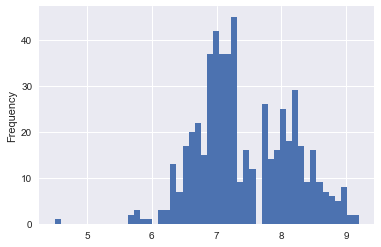

In [118]:
df_final['imbd_rating'].plot.hist(bins=50);

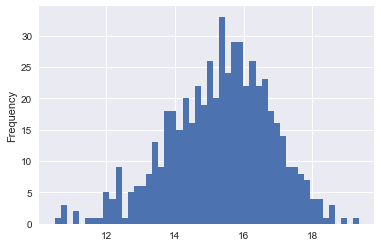

In [119]:
df_final['talking_time'].plot.hist(bins=50);

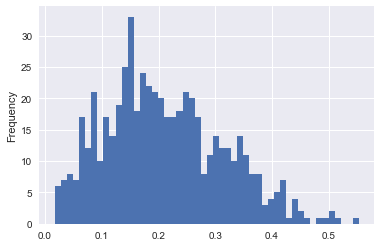

In [120]:
# Homer's talking percent
df_final['2.0_c_id'].plot.hist(bins=50);

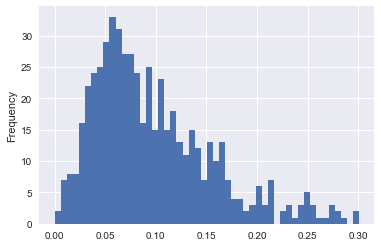

In [121]:
# Marge's talking percent
df_final['1.0_c_id'].plot.hist(bins=50);

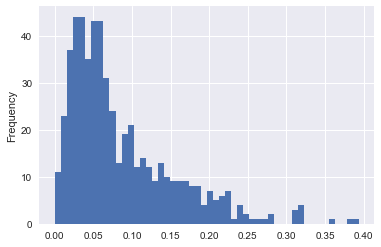

In [122]:
# Bart's talking percent
df_final['8.0_c_id'].plot.hist(bins=50);

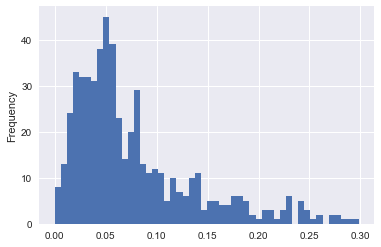

In [123]:
# Lisa's talking percent
df_final['9.0_c_id'].plot.hist(bins=50);

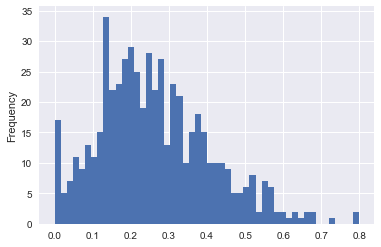

In [124]:
# Percent of time spent at simpson home
df_final['5.0_l_id'].plot.hist(bins=50);

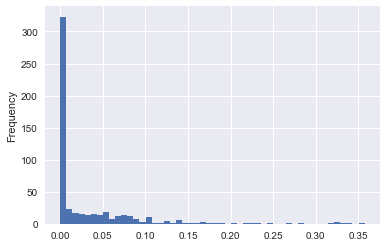

In [125]:
# Percent of time spent at moe's tavern
df_final['15.0_l_id'].plot.hist(bins=50);

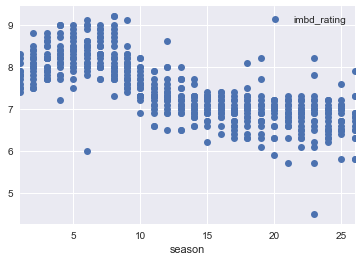

In [126]:
df_final.plot(x='season', y='imbd_rating', style='o')

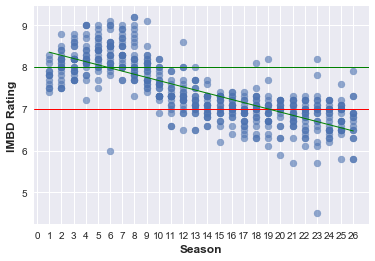

In [127]:
plt.scatter(df_final['season'], df_final['imbd_rating'], alpha=.6)
plt.axhline(y=7, color='r', linestyle='-', linewidth=1)
plt.axhline(y=8, color='g', linestyle='-', linewidth=1)
plt.ylabel('IMBD Rating', fontsize='large', fontweight='bold')
plt.xlabel('Season', fontsize='large', fontweight='bold')
plt.yticks(fontsize='medium')
plt.xticks(np.arange(0,27,1), fontsize='medium')
plt.plot(np.unique(df_final['season']), np.poly1d(np.polyfit(df_final['season'], df_final['imbd_rating'], 1))(np.unique(df_final['season'])), color='g', linewidth=1);


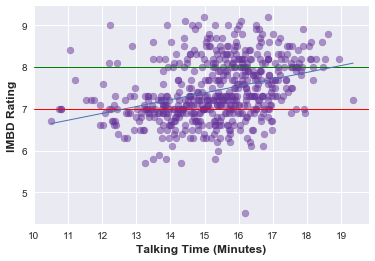

In [128]:
plt.scatter(df_final['talking_time'], df_final['imbd_rating'], alpha=.5, c='rebeccapurple')
plt.axhline(y=7, color='r', linestyle='-', linewidth=1)
plt.axhline(y=8, color='g', linestyle='-', linewidth=1)
plt.ylabel('IMBD Rating', fontsize='large', fontweight='bold')
plt.xlabel('Talking Time (Minutes)', fontsize='large', fontweight='bold')
plt.yticks(fontsize='medium')
plt.xticks(np.arange(10,20,1), fontsize='medium')
plt.xlim(xmin=10)
plt.plot(np.unique(df_final['talking_time']), np.poly1d(np.polyfit(df_final['talking_time'], df_final['imbd_rating'], 1))(np.unique(df_final['talking_time'])), linewidth=1)

(10, 70.861499402628439)

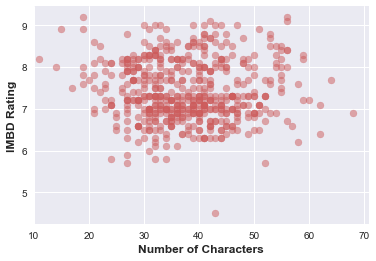

In [129]:
plt.scatter(df_final['total_characters'], df_final['imbd_rating'], alpha=.5, c='indianred')
plt.ylabel('IMBD Rating', fontsize='large', fontweight='bold')
plt.xlabel('Number of Characters', fontsize='large', fontweight='bold')
plt.yticks(fontsize='medium')
plt.xticks(fontsize='medium')
plt.xlim(xmin=10)


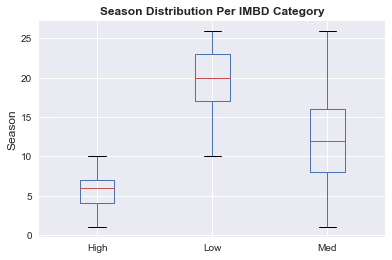

In [130]:
df_final.boxplot('season', by='imbd_category')
plt.suptitle("")
plt.xlabel("")
plt.ylabel("Season", fontsize='large')
plt.title('Season Distribution Per IMBD Category', fontsize='large', fontweight='bold');

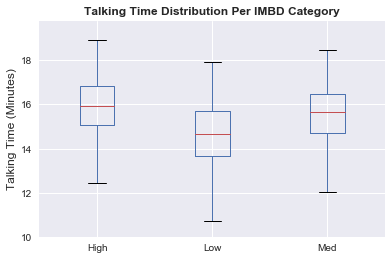

In [131]:
df_final.boxplot('talking_time', by='imbd_category')
plt.ylim(ymin=10)
plt.suptitle("")
plt.xlabel("")
plt.ylabel("Talking Time (Minutes)", fontsize='large')
plt.title('Talking Time Distribution Per IMBD Category', fontsize='large', fontweight='bold');

In [132]:
from sklearn.cross_validation import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation

import matplotlib.pyplot as plt
%matplotlib inline

/Users/mac/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/mac/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [133]:
cols = list(df_tfidf.columns)
cols2 = list(df_basic.columns)

In [134]:
# Testing model with tfidf features only first

X = df_final

y = df_final['imbd_category']

In [194]:
# Testing model with tfidf features only first
X_train, X_test, y_train, y_test = train_test_split(X.loc[:, cols], y, test_size=0.3, stratify=y)

In [221]:
rf_tfidf_model = RandomForestClassifier(n_estimators = 1000, max_depth=10, min_samples_split=2, max_features=15)
rf_tfidf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=15, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [222]:
# Random Forest model scores for tfidf
test_set_pred = rf_tfidf_model.predict(X_test)
y_score_tfidf = rf_tfidf_model.predict_proba(X_test,)[:,1]
accuracy_score(y_test,test_set_pred)

0.43373493975903615

In [223]:
classification_report(y_test,test_set_pred)

'             precision    recall  f1-score   support\n\n       High       0.40      0.05      0.09        39\n        Low       0.42      0.29      0.34        56\n        Med       0.44      0.76      0.56        71\n\navg / total       0.42      0.43      0.37       166\n'

In [201]:
sorted(list(zip(X_train.columns, rf_tfidf_model.feature_importances_)), key=lambda x: x[1], reverse=True)

[('ohh', 0.035350775911989485),
 ('ye', 0.029273657119725873),
 ('lou', 0.0288961202114827),
 ('geez', 0.028121369925487617),
 ('queen', 0.023882858243427407),
 ('horse', 0.020482082203813007),
 ('vote', 0.017792251095593951),
 ('band', 0.016116832315474245),
 ('mistake', 0.016008074492496801),
 ('martin', 0.015795091161467642),
 ('radio', 0.01460276655795654),
 ('baseball', 0.014380321562827241),
 ('art', 0.014245934974986297),
 ('crime', 0.013836968864775407),
 ('bite', 0.013418041866244497),
 ('prison', 0.013015424573808247),
 ('science', 0.012371896541684751),
 ('reverend', 0.012051725547854934),
 ('shoes', 0.011518836083381475),
 ('camera', 0.011312901705271874),
 ('cake', 0.011067502329946549),
 ('garbage', 0.010996968865288895),
 ('joe', 0.010881099983924593),
 ('bear', 0.010657941005470661),
 ('patty', 0.010450592401789258),
 ('captain', 0.01025754052253746),
 ('bottle', 0.010121862583419409),
 ('push', 0.010052791737053412),
 ('abe', 0.0099036889474627531),
 ('film', 0.0098604

In [202]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [203]:
# Logistic Regression model scores for tfidf
test_set_pred_lr = lr_model.predict(X_test)
y_score_lr = lr_model.predict_proba(X_test,)[:,1]
accuracy_score(y_test,test_set_pred_lr)

0.4759036144578313

In [204]:
classification_report(y_test,test_set_pred_lr)

'             precision    recall  f1-score   support\n\n       High       0.56      0.13      0.21        39\n        Low       0.39      0.27      0.32        56\n        Med       0.50      0.83      0.62        71\n\navg / total       0.48      0.48      0.42       166\n'

In [224]:
# Coeficients for low prediction
sorted(list(zip(X_train.columns, lr_model.coef_[0])), key=lambda x: x[1], reverse=True)

[('ye', 1.7067317759483716),
 ('martin', 1.353147528445612),
 ('mistake', 0.91938551248485378),
 ('blah', 0.84830778872957435),
 ('crime', 0.75797460190715882),
 ('garbage', 0.67596333089784599),
 ('bottle', 0.63562799592109731),
 ('vote', 0.63001477705102038),
 ('race', 0.58029230036157053),
 ('push', 0.55601936051443679),
 ('scratchy', 0.49475676316236067),
 ('mayor', 0.49474070039373086),
 ('captain', 0.46853054935179894),
 ('ohh', 0.46109282757520603),
 ('camera', 0.43148422455259361),
 ('doo', 0.42452823704269027),
 ('chair', 0.42438491442273923),
 ('boo', 0.41386094968101833),
 ('suit', 0.39048862146494662),
 ('ralph', 0.38861951291495211),
 ('bob', 0.37514278346473268),
 ('radio', 0.36171201807676351),
 ('pig', 0.34304279894102591),
 ('duff', 0.29472784314102418),
 ('sugar', 0.28982041193779651),
 ('itchy', 0.28975621142362812),
 ('meat', 0.2857898951431232),
 ('totally', 0.27025208213175111),
 ('ba', 0.27008593344550375),
 ('joe', 0.24562612612354098),
 ('build', 0.237602277114

In [225]:
# Coeficients for high predictor
sorted(list(zip(X_train.columns, lr_model.coef_[2])), key=lambda x: x[1], reverse=True)

[('geez', 1.2807473518134846),
 ('ohh', 1.2227248302155747),
 ('patty', 1.0187260314217583),
 ('comic', 0.96082512370313866),
 ('shoes', 0.79125833778097232),
 ('ol', 0.72402735062639889),
 ('science', 0.70738492570600564),
 ('dress', 0.68958436406583945),
 ('bite', 0.67451960169119496),
 ('cake', 0.66730040303924532),
 ('murder', 0.61351172599812198),
 ('letter', 0.60316163593942396),
 ('island', 0.60071032841970573),
 ('radio', 0.58793267772221502),
 ('cash', 0.58247562479560089),
 ('record', 0.57890932199721434),
 ('moon', 0.51513173721200889),
 ('film', 0.50052386042759789),
 ('santa', 0.49706882825583865),
 ('gold', 0.43334867991712805),
 ('video', 0.4291730416400989),
 ('reverend', 0.41200466318168971),
 ('babies', 0.36942210830410277),
 ('suit', 0.29761436397785379),
 ('college', 0.29265730229198722),
 ('winner', 0.27899658833159297),
 ('ugly', 0.27438364979694541),
 ('brockman', 0.27432593583453663),
 ('totally', 0.26347040543954148),
 ('tony', 0.24181061917227373),
 ('chair', 

In [226]:
X2 = df_final

y2 = df_final['imbd_category']

In [138]:
# Trying model with no tfidf features
X2_train, X2_test, y2_train, y2_test = train_test_split(X2.loc[:, cols2], y2, test_size=0.3, random_state=500, stratify=y)

In [139]:
lr_model2 = LogisticRegression()
lr_model2.fit(X2_train,y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [140]:
# Logistic Regression model scores for basic features
test_set_pred_lr2 = lr_model2.predict(X2_test)
y_score_lr2 = lr_model2.predict_proba(X2_test,)[:,1]
accuracy_score(y2_test,test_set_pred_lr2)

0.65662650602409633

In [141]:
classification_report(y2_test,test_set_pred_lr2)

'             precision    recall  f1-score   support\n\n       High       0.71      0.67      0.69        36\n        Low       0.71      0.73      0.72        63\n        Med       0.58      0.58      0.58        67\n\navg / total       0.66      0.66      0.66       166\n'

In [142]:
# Coeficients for low prediction
sorted(list(zip(X2_train.columns, lr_model2.coef_[0])), key=lambda x: x[1], reverse=True)

[('10.0_l_id', 0.96727942645708909),
 ('top_star', 0.50921912474958375),
 ('31.0_c_id', 0.46907366194873645),
 ('153.0_c_id', 0.40639845759863891),
 ('25.0_c_id', 0.3014920451283315),
 ('11.0_c_id', 0.25096286938411244),
 ('8.0_c_id', 0.24280604627308239),
 ('40.0_c_id', 0.21915203091193883),
 ('3.0_l_id', 0.18754217835936321),
 ('14.0_c_id', 0.16730296408801629),
 ('3.0_c_id', 0.16292918267393744),
 ('48.0_l_id', 0.13679863992913585),
 ('240.0_c_id', 0.094569458820058544),
 ('1078.0_c_id', 0.082006023373767695),
 ('71.0_c_id', 0.076793906327368405),
 ('5.0_l_id', 0.076254853509883716),
 ('211.0_c_id', 0.073413708046492387),
 ('17.0_c_id', 0.056717350190272187),
 ('442.0_c_id', 0.055869528992911269),
 ('332.0_c_id', 0.047653286600227857),
 ('9.0_c_id', 0.045549770096671639),
 ('18.0_c_id', 0.043756307559391527),
 ('total_characters', 0.037653484678728609),
 ('136.0_l_id', 0.035859880838468888),
 ('165.0_c_id', 0.023145146015863961),
 ('44.0_l_id', 0.0016466120890912964),
 ('15.0_l_id',

In [143]:
# Coeficients for high prediction
sorted(list(zip(X2_train.columns, lr_model2.coef_[2])), key=lambda x: x[1], reverse=True)

[('2.0_c_id', 0.61572057318568885),
 ('216.0_l_id', 0.57407633091655486),
 ('801.0_c_id', 0.38021612786218012),
 ('101.0_c_id', 0.30237416379950122),
 ('131.0_l_id', 0.23428137920301526),
 ('71.0_c_id', 0.17521598625989163),
 ('442.0_c_id', 0.14083399382591463),
 ('15.0_c_id', 0.12936704406314564),
 ('17.0_c_id', 0.11719607119355101),
 ('136.0_l_id', 0.10588786146580483),
 ('332.0_c_id', 0.10063592189874827),
 ('15.0_l_id', 0.085964749488316824),
 ('208.0_c_id', 0.059963306691948631),
 ('talking_time', 0.053610726478505337),
 ('140.0_c_id', 0.024544509733983814),
 ('5.0_l_id', 0.024486666718175787),
 ('404.0_c_id', 0.020247948614188299),
 ('1.0_c_id', 0.010423066120171813),
 ('33.0_c_id', 0.0072678635251513255),
 ('22.0_c_id', 0.0033828506453145945),
 ('170.0_c_id', -0.0015065086357383983),
 ('total_characters', -0.0027654090766436198),
 ('8.0_c_id', -0.016157004774651897),
 ('165.0_c_id', -0.018030265387062247),
 ('season', -0.033775194998444051),
 ('9.0_c_id', -0.045501177979296779),

In [174]:
rf_model2 = RandomForestClassifier(n_estimators = 1000, max_depth=12, min_samples_split=6, max_features=16, min_samples_leaf=6)
rf_model2.fit(X2_train,y2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=16, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=6,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [175]:
# Random Forest model scores
test_set_pred2 = rf_model2.predict(X2_test)
y_score_rf = rf_model2.predict_proba(X2_test,)[:,1]
accuracy_score(y2_test,test_set_pred2)

0.65662650602409633

In [146]:
classification_report(y2_test,test_set_pred2)

'             precision    recall  f1-score   support\n\n       High       0.68      0.69      0.68        36\n        Low       0.74      0.79      0.76        63\n        Med       0.62      0.57      0.59        67\n\navg / total       0.68      0.68      0.68       166\n'

In [147]:
sorted(list(zip(X2_train.columns, rf_model2.feature_importances_)), key=lambda x: x[1], reverse=True)

[('season', 0.26828052660515345),
 ('talking_time', 0.061382309679054232),
 ('1.0_c_id', 0.045227508296693336),
 ('5.0_l_id', 0.031606426518197152),
 ('8.0_c_id', 0.030186528759061311),
 ('11.0_c_id', 0.029922553173443049),
 ('2.0_c_id', 0.027031237649207864),
 ('216.0_l_id', 0.024995253787764789),
 ('total_characters', 0.024665022472101197),
 ('9.0_c_id', 0.024400378713527088),
 ('25.0_c_id', 0.021159637047240155),
 ('170.0_c_id', 0.021045206477596182),
 ('165.0_c_id', 0.020860104572999919),
 ('10.0_l_id', 0.020461481487665106),
 ('151.0_l_id', 0.020223996847555728),
 ('18.0_c_id', 0.019116922685854004),
 ('17.0_c_id', 0.018342389051077629),
 ('71.0_c_id', 0.017360380373060116),
 ('101.0_c_id', 0.017219932035661658),
 ('31.0_c_id', 0.016410228470363292),
 ('139.0_c_id', 0.014289055547381302),
 ('3.0_c_id', 0.013908950579949113),
 ('14.0_c_id', 0.013829262413630989),
 ('208.0_c_id', 0.013686738255792153),
 ('15.0_c_id', 0.013628417718161425),
 ('211.0_c_id', 0.0132952581181863),
 ('15.

In [167]:
params = {
    "n_estimators": [1000],
    "max_depth": [10, 11, 12, 13, 14, 15],
    "max_features": list(np.arange(10, 18, 1)),
    "min_samples_split": [2, 3, 4, 5, 6],
    "min_samples_leaf": [6]
}

model = RandomForestClassifier()
rf_grid_search = GridSearchCV(model, params, n_jobs=-2, cv=5, verbose=1)
rf_grid_search.fit(X2_train,y2_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-2)]: Done 786 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-2)]: Done 1200 out of 1200 | elapsed:  9.5min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-2,
       param_grid={'n_estimators': [1000], 'max_depth': [10, 11, 12, 13, 14, 15], 'max_features': [10, 11, 12, 13, 14, 15, 16, 17], 'min_samples_split': [2, 3, 4, 5, 6], 'min_samples_leaf': [6]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [168]:
rf_grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=16, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=6,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [169]:
rf_grid_search.best_score_

0.6683937823834197

In [165]:
gb_model = GradientBoostingClassifier(n_estimators = 500, learning_rate=0.01, subsample=.8, max_features=22, min_samples_split=6)
gb_model.fit(X2_train,y2_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=22, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=6, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=0.8, verbose=0, warm_start=False)

In [166]:
# Gradient Boosted model scores
test_set_pred3 = gb_model.predict(X2_test)
y_score_gb = gb_model.predict_proba(X2_test,)[:,1]
accuracy_score(y2_test,test_set_pred3)

0.68072289156626509

In [162]:
params = {
    "n_estimators": [500],
    "learning_rate": [.1, .01, .001],
    "max_features": np.arange(16, 28, 1),
    "subsample": [.8],
    "min_samples_split": [4, 5, 6, 7]
}

model = GradientBoostingClassifier()
gb_grid_search = GridSearchCV(model, params, n_jobs=-2, cv=5, verbose=1)
gb_grid_search.fit(X2_train,y2_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-2)]: Done 720 out of 720 | elapsed:  4.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-2,
       param_grid={'n_estimators': [500], 'learning_rate': [0.1, 0.01, 0.001], 'max_features': array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]), 'subsample': [0.8], 'min_samples_split': [4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [163]:
gb_grid_search.best_params_

{'learning_rate': 0.01,
 'max_features': 22,
 'min_samples_split': 6,
 'n_estimators': 500,
 'subsample': 0.8}

In [164]:
gb_grid_search.best_score_

0.6580310880829016

In [187]:
# Trying all features combined into one model
cols3 = set(cols + cols2)

In [191]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X.loc[:,cols3], y, test_size=0.3, stratify=y)

In [192]:
lr_model3 = LogisticRegression()
lr_model3.fit(X3_train,y3_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [193]:
test_set_pred_lr3 = lr_model3.predict(X3_test)
y_score_lr3 = lr_model3.predict_proba(X3_test,)[:,1]
accuracy_score(y3_test,test_set_pred_lr3)

0.65662650602409633

In [239]:
rf_model3 = RandomForestClassifier(n_estimators = 1000, max_depth=20, min_samples_split=6, max_features=20)
rf_model3.fit(X3_train,y3_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features=20, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [240]:
# Random Forest model scores
test_set_pred3 = rf_model3.predict(X3_test)
y_score_rf3 = rf_model3.predict_proba(X3_test,)[:,1]
accuracy_score(y3_test,test_set_pred3)

0.6506024096385542

In [241]:
classification_report(y3_test,test_set_pred3)

'             precision    recall  f1-score   support\n\n       High       0.70      0.49      0.58        39\n        Low       0.71      0.75      0.73        56\n        Med       0.59      0.66      0.62        71\n\navg / total       0.66      0.65      0.65       166\n'

In [242]:
sorted(list(zip(X3_train.columns, rf_model3.feature_importances_)), key=lambda x: x[1], reverse=True)

[('season', 0.18612631032696447),
 ('talking_time', 0.047426186681923728),
 ('1.0_c_id', 0.02285447860640398),
 ('2.0_c_id', 0.020050296308502993),
 ('18.0_c_id', 0.018418504384247334),
 ('5.0_l_id', 0.017443838929596511),
 ('170.0_c_id', 0.0167625749483718),
 ('8.0_c_id', 0.015845624198511866),
 ('31.0_c_id', 0.01548289287185816),
 ('9.0_c_id', 0.014793240398840238),
 ('14.0_c_id', 0.013316104885933761),
 ('3.0_c_id', 0.013197409553718457),
 ('165.0_c_id', 0.013180435193191087),
 ('total_characters', 0.012965924163682734),
 ('216.0_l_id', 0.012567221140819497),
 ('10.0_l_id', 0.011605084041573921),
 ('33.0_c_id', 0.010407917131383648),
 ('25.0_c_id', 0.010156932941029059),
 ('ye', 0.010067485486640902),
 ('17.0_c_id', 0.010037749118702137),
 ('71.0_c_id', 0.010010896459453881),
 ('ohh', 0.0093622064845385773),
 ('801.0_c_id', 0.0089717978669622226),
 ('15.0_c_id', 0.0088999071288908948),
 ('332.0_c_id', 0.0086520847340096092),
 ('11.0_c_id', 0.0085433812340868706),
 ('139.0_c_id', 0.0

In [255]:
gb_model2 = GradientBoostingClassifier(n_estimators = 500, learning_rate=0.01, subsample=.8, max_features=26, min_samples_split=6)
gb_model2.fit(X3_train,y3_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=26, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=6, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=0.8, verbose=0, warm_start=False)

In [256]:
# Gradient Boosted model scores
test_set_pred4 = gb_model2.predict(X3_test)
y_score_gb = gb_model2.predict_proba(X3_test,)[:,1]
accuracy_score(y3_test,test_set_pred4)

0.66265060240963858

In [259]:
classification_report(y3_test,test_set_pred4)

'             precision    recall  f1-score   support\n\n       High       0.71      0.56      0.63        39\n        Low       0.70      0.77      0.74        56\n        Med       0.61      0.63      0.62        71\n\navg / total       0.66      0.66      0.66       166\n'

In [258]:
sorted(list(zip(X3_train.columns, gb_model.feature_importances_)), key=lambda x: x[1], reverse=True)

[('season', 0.20167972564194797),
 ('talking_time', 0.038691753636808865),
 ('1.0_c_id', 0.025535807835625292),
 ('18.0_c_id', 0.021961932460503701),
 ('216.0_l_id', 0.021743639735014163),
 ('2.0_c_id', 0.018888833563824682),
 ('9.0_c_id', 0.017343482386868198),
 ('5.0_l_id', 0.016008903594678634),
 ('vote', 0.015866299685602037),
 ('ye', 0.014454767888812253),
 ('8.0_c_id', 0.013403637989536804),
 ('10.0_l_id', 0.01298561802926056),
 ('31.0_c_id', 0.012749529805457557),
 ('horse', 0.012248558539016954),
 ('170.0_c_id', 0.012052967198473159),
 ('240.0_c_id', 0.011965766049072409),
 ('165.0_c_id', 0.011581955399299269),
 ('reverend', 0.011499500420579248),
 ('3.0_c_id', 0.011355526523283617),
 ('bible', 0.011153625394503422),
 ('comic', 0.010253222778040012),
 ('801.0_c_id', 0.010183660372327999),
 ('college', 0.010121315982670158),
 ('lou', 0.010080140589958701),
 ('cake', 0.0099212982817337998),
 ('patty', 0.0094555040513554425),
 ('14.0_c_id', 0.0093215303373918104),
 ('abe', 0.00913

In [260]:
import pickle

with open('simpsons.pkl', 'wb') as picklefile:
    pickle.dump(rf_model2, picklefile)

In [261]:
for i in cols2:
    print(df_final[i].describe())

count    552.000000
mean      13.257246
std        7.335302
min        1.000000
25%        7.000000
50%       13.000000
75%       20.000000
max       26.000000
Name: season, dtype: float64
count    552.000000
mean      37.751812
std        8.986277
min       11.000000
25%       31.000000
50%       37.000000
75%       44.000000
max       68.000000
Name: total_characters, dtype: float64
count    552.000000
mean      15.308599
std        1.503358
min       10.503333
25%       14.325417
50%       15.423333
75%       16.357083
max       19.353333
Name: talking_time, dtype: float64
count    552.000000
mean       0.088768
std        0.284667
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: top_star, dtype: float64
count    552.000000
mean       0.210077
std        0.104255
min        0.017068
25%        0.135179
50%        0.197177
75%        0.276350
max        0.553122
Name: 2.0_c_id, dtype: float64
count    552.000000
mean       0.09

In [267]:
# Features for my final model include columns 2-45 of the df_final data frame. The first 10 feature values will
# come from my d3 sliders. Grabbing remaining feature values for a base example case.
base_example = list(df_final.loc[df_final['episode_id'] == 360].values[0])[11:45]

In [266]:
list(zip(df_final.columns, list(df_final.loc[df_final['episode_id'] == 360].values[0])))

[('episode_id', 360),
 ('season', 17),
 ('total_characters', 52),
 ('talking_time', 13.348333333333333),
 ('top_star', 0),
 ('2.0_c_id', 0.1610337972166998),
 ('1.0_c_id', 0.07852882703777336),
 ('8.0_c_id', 0.08697813121272366),
 ('9.0_c_id', 0.04920477137176938),
 ('5.0_l_id', 0.31610337972167),
 ('15.0_l_id', 0.0),
 ('3.0_l_id', 0.0),
 ('10.0_l_id', 0.0),
 ('44.0_l_id', 0.017892644135188866),
 ('48.0_l_id', 0.0),
 ('131.0_l_id', 0.0),
 ('136.0_l_id', 0.0),
 ('151.0_l_id', 0.03479125248508946),
 ('216.0_l_id', 0.16749502982107356),
 ('3.0_c_id', 0.002485089463220676),
 ('11.0_c_id', 0.015904572564612324),
 ('14.0_c_id', 0.0019880715705765406),
 ('15.0_c_id', 0.05168986083499006),
 ('17.0_c_id', 0.03081510934393638),
 ('18.0_c_id', 0.003976143141153081),
 ('22.0_c_id', 0.004970178926441352),
 ('25.0_c_id', 0.00944333996023857),
 ('31.0_c_id', 0.0),
 ('33.0_c_id', 0.0),
 ('40.0_c_id', 0.0),
 ('71.0_c_id', 0.0074552683896620285),
 ('101.0_c_id', 0.013916500994035786),
 ('139.0_c_id', 0.

In [268]:
base_example

[0.0,
 0.0,
 0.017892644135188866,
 0.0,
 0.0,
 0.0,
 0.03479125248508946,
 0.16749502982107356,
 0.002485089463220676,
 0.015904572564612324,
 0.0019880715705765406,
 0.05168986083499006,
 0.03081510934393638,
 0.003976143141153081,
 0.004970178926441352,
 0.00944333996023857,
 0.0,
 0.0,
 0.0,
 0.0074552683896620285,
 0.013916500994035786,
 0.003976143141153081,
 0.0,
 0.0,
 0.006958250497017893,
 0.023856858846918492,
 0.014413518886679919,
 0.0,
 0.04174950298210736,
 0.05268389662027833,
 0.004473161033797217,
 0.0,
 0.0034791252485089465,
 0.0]

In [269]:
with open("example.txt", "wb") as picklefile:
    pickle.dump(base_example, picklefile)